INFO: Query finished. [astroquery.utils.tap.core]
2.4025185978845958
18.65557445526123


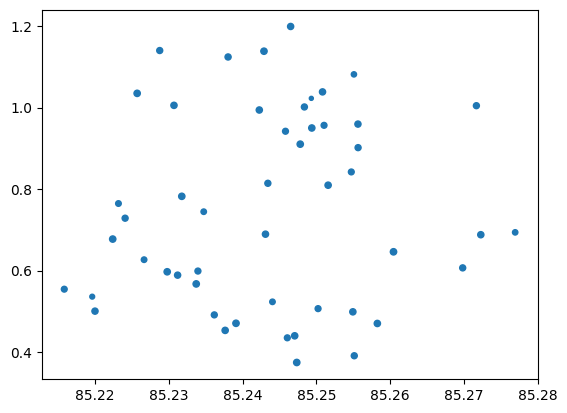

        pmra        
      mas / yr      
--------------------
   12.07353490504518
  -2.333883076835494
  -21.57967359632912
   -9.46137597862166
  0.6949665404817307
   1.308039377276725
                 ...
    -0.7804160169837
-0.12706630176737133
  -4.671959177975444
 -5.5512740851961855
 -1.2999974502703988
  -5.335032817434669
   6.120384505234959
Length = 50 rows


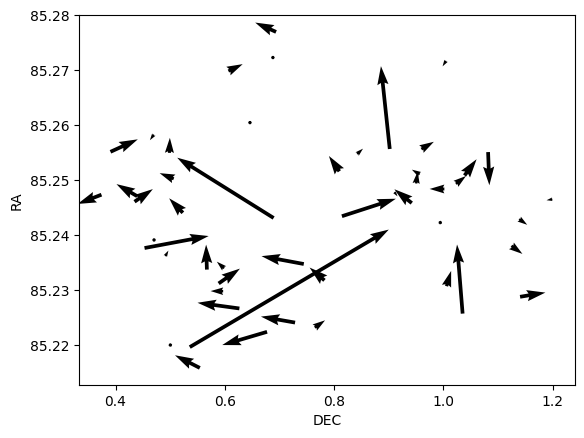

In [1]:

import os
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astropy.io import ascii
from astropy.table import unique
from astropy.table import Table
import numpy as np

from astroquery.gaia import Gaia

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

import astropy.units as u

from astropy.coordinates import SkyCoord

from astroquery.gaia import Gaia


coord = SkyCoord(ra=(00+47/60+ 11.5/3600),dec=(+85+14/60+ 38/3600), unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(1, u.deg)

height = u.Quantity(1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

Gaia.ROW_LIMIT=-1

Empty=np.asarray(r['ra'])
Empty=np.stack((Empty, np.asarray(r['dec'])), axis=1)
Empty=np.column_stack([Empty, np.asarray(r['phot_g_mean_mag'])])

MEAN=np.mean(Empty[:,2])
MAX=np.max(Empty[:,2])
MIN=np.argmin(Empty[:,2])
STD=np.sqrt(np.sum((Empty[:,2]-MEAN)**2)/len(Empty[:,2]))
print(STD)
print(MEAN)
np.savetxt("Data.txt",Empty)


plt.scatter(r['dec'],r['ra'],s=r['phot_g_mean_mag'])
plt.show()
fig, ax = plt.subplots()
print(r['pmra'])

ax.quiver(r['ra'].filled(0),r['dec'].filled(0),r['pmra'].filled(0),r['pmdec'].filled(0))
plt.xlabel('DEC')
plt.ylabel('RA')
plt.show()

In [26]:
import ipympl